In [1]:
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "SPLAT PLY_bouwpub cropped_inBlender.ply"

ply_data = PlyData.read(file_path)
vertices = ply_data['vertex']
vertex_data = ply_data['vertex']
headers = vertex_data.data.dtype.names

variables_per_header = dict()
for header in headers:
    variables_per_header[header] = []

for i, vertex in enumerate(vertices):
    for header in headers:
        variables_per_header[header].append(vertex_data[header][i])

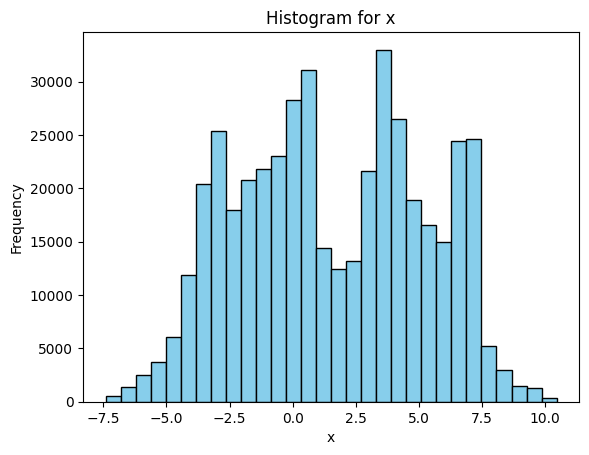

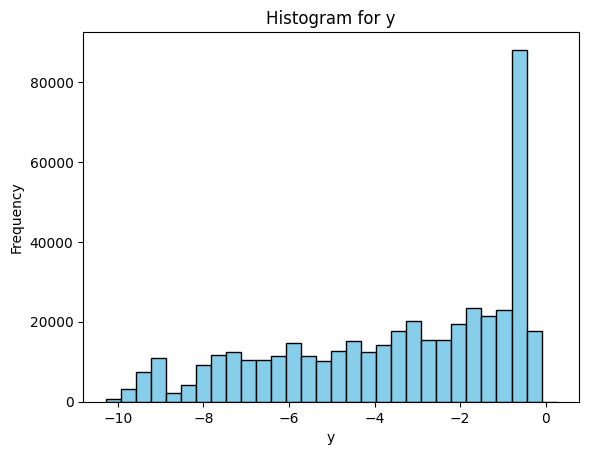

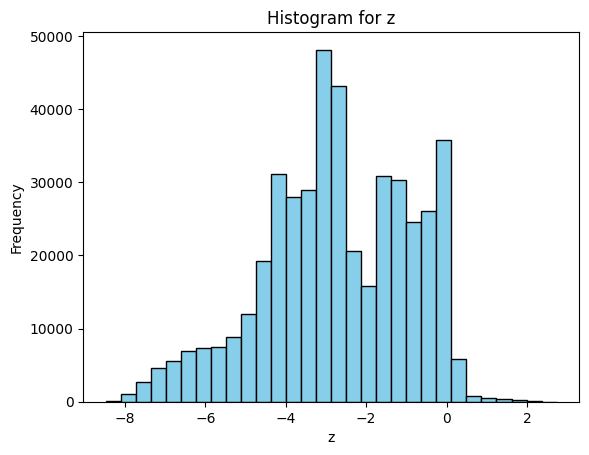

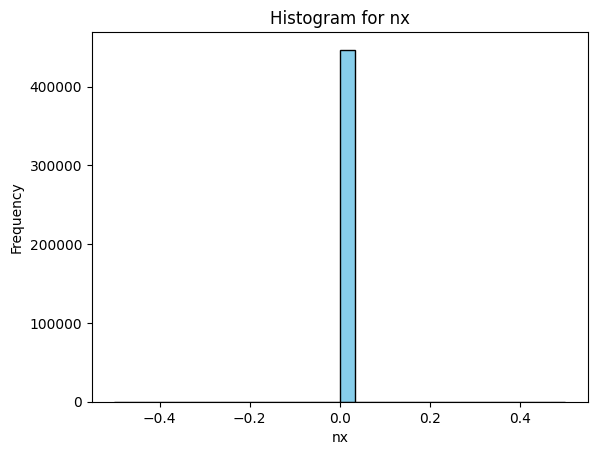

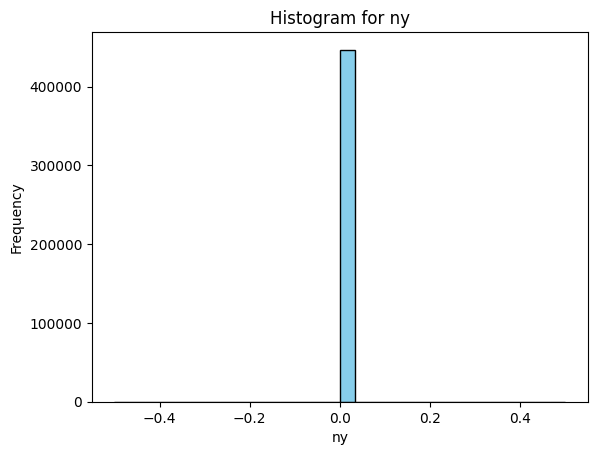

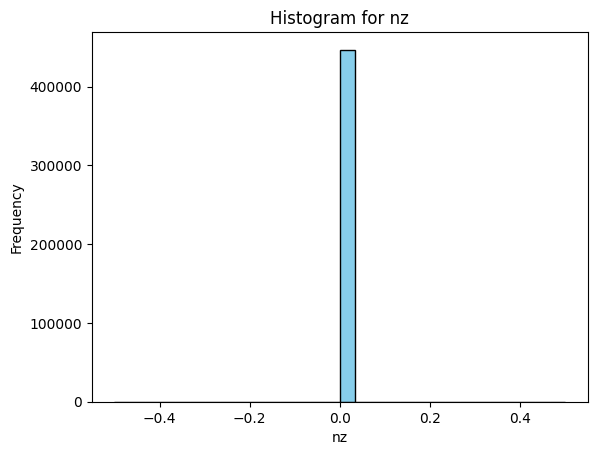

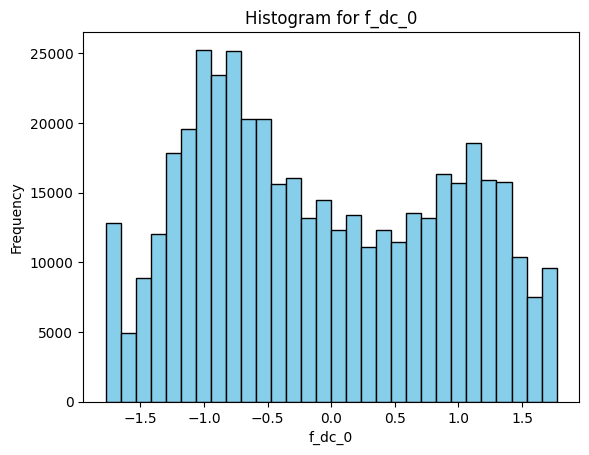

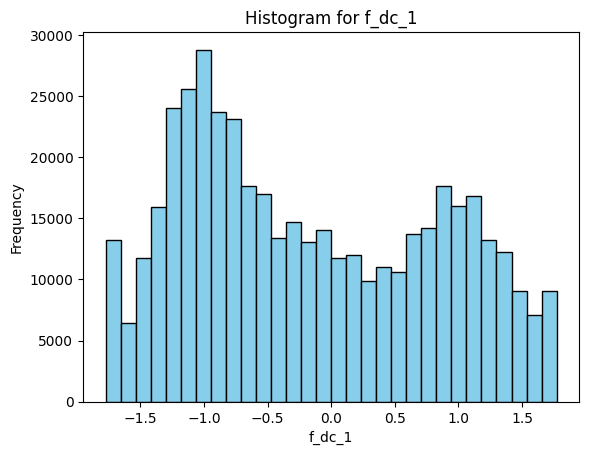

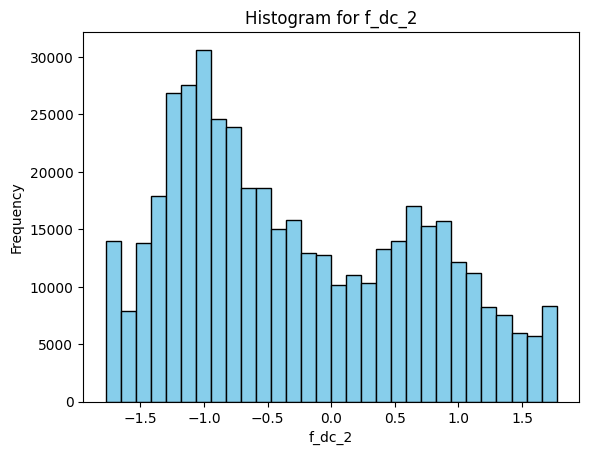

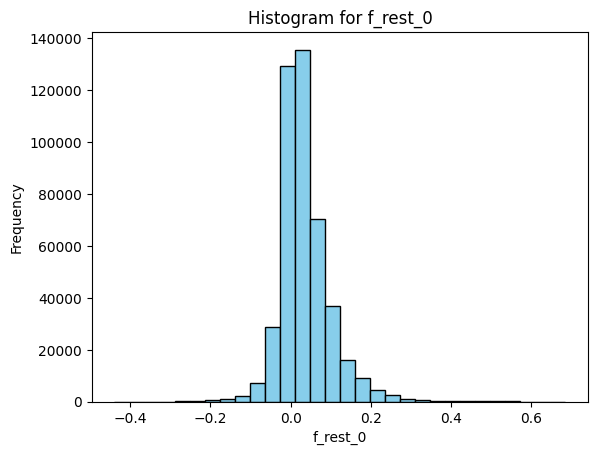

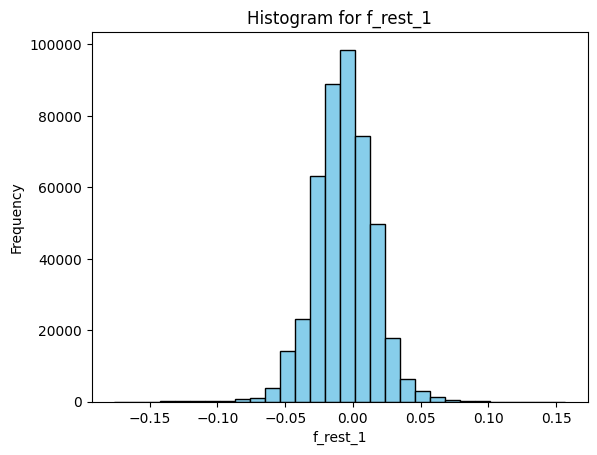

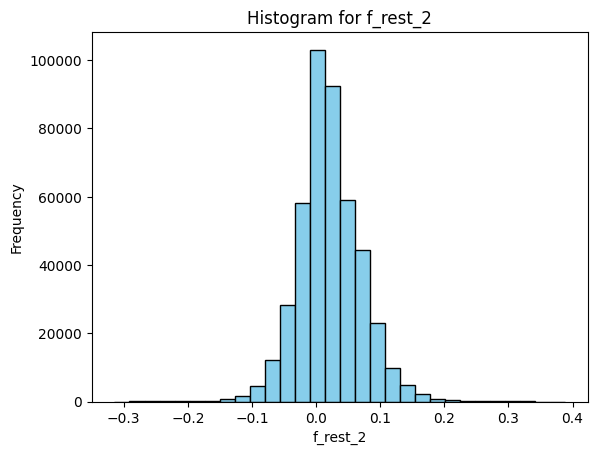

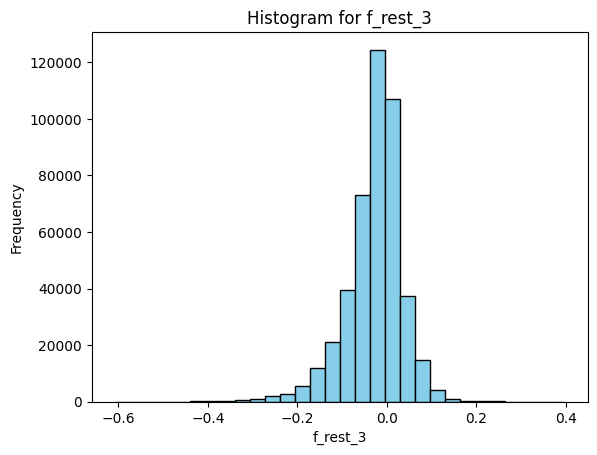

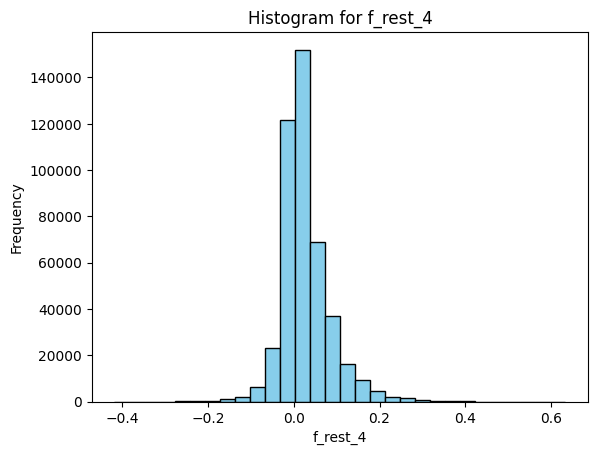

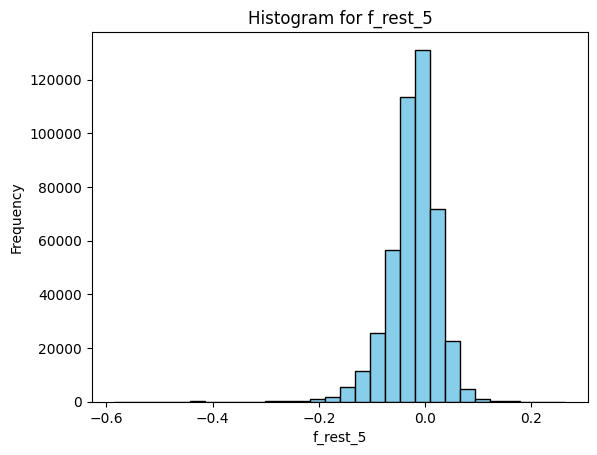

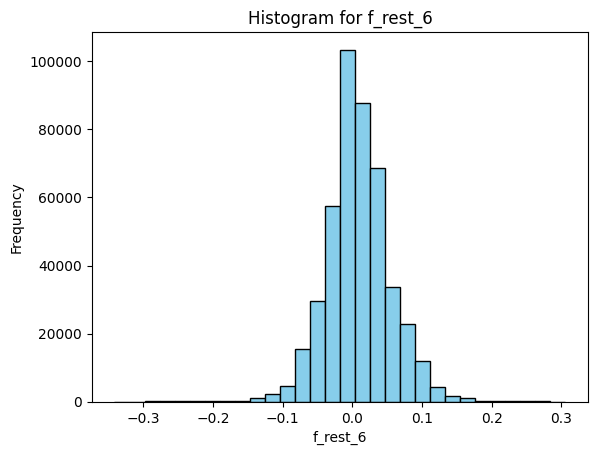

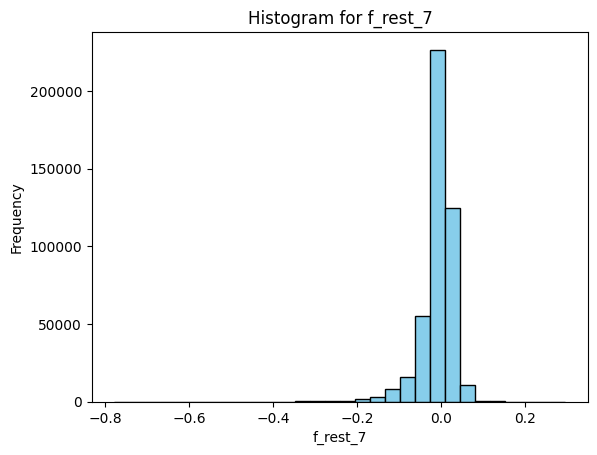

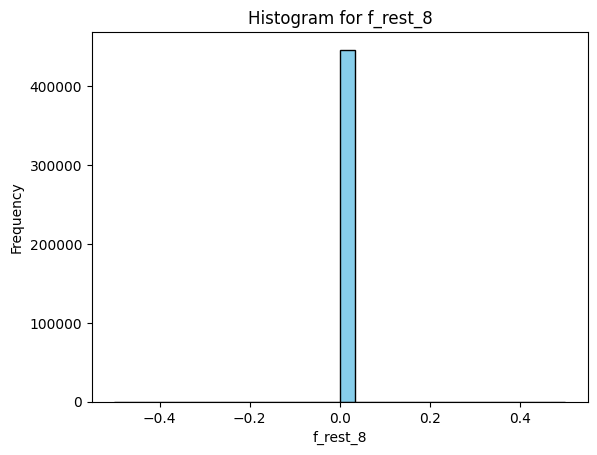

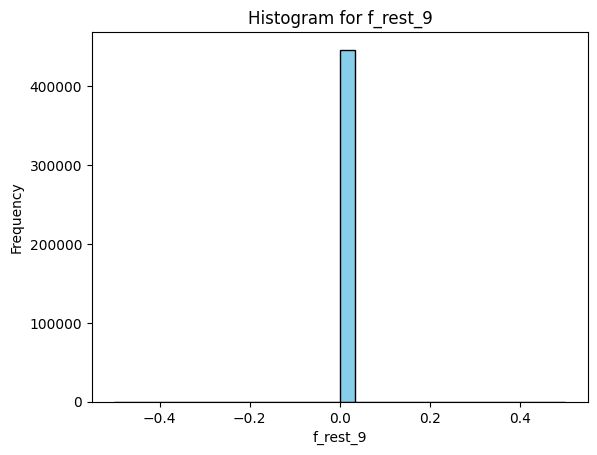

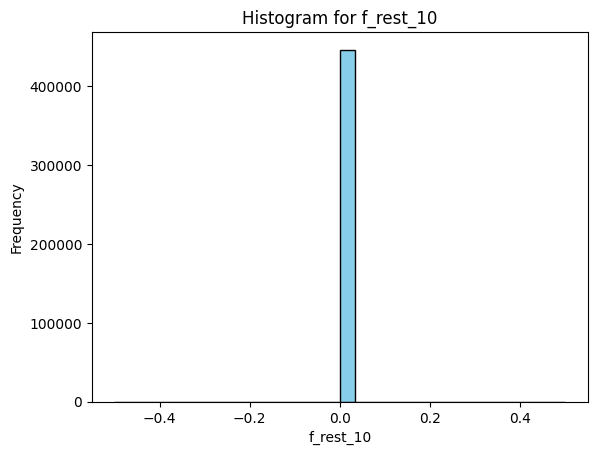

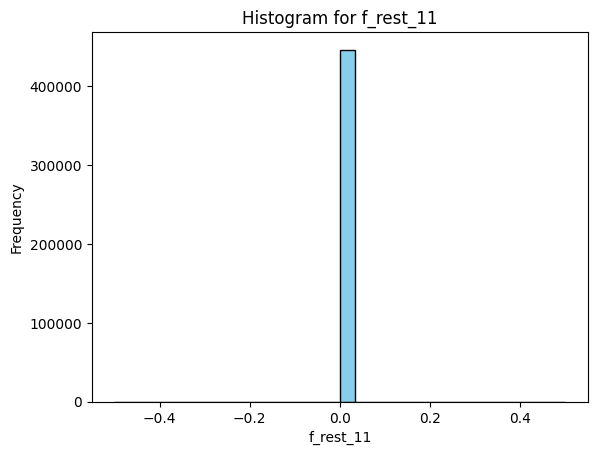

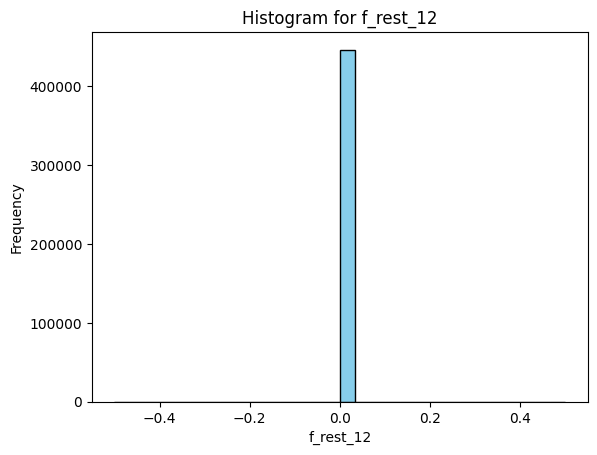

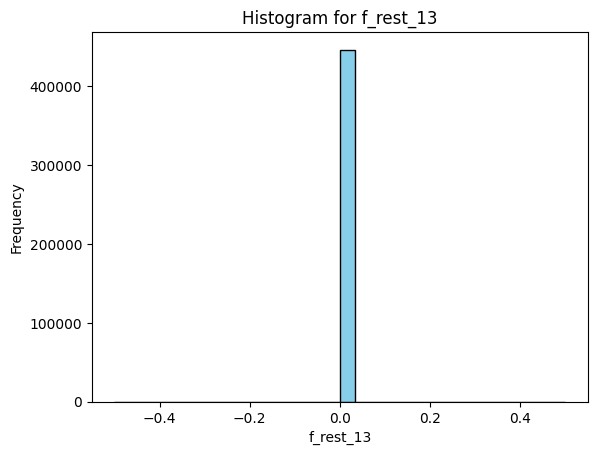

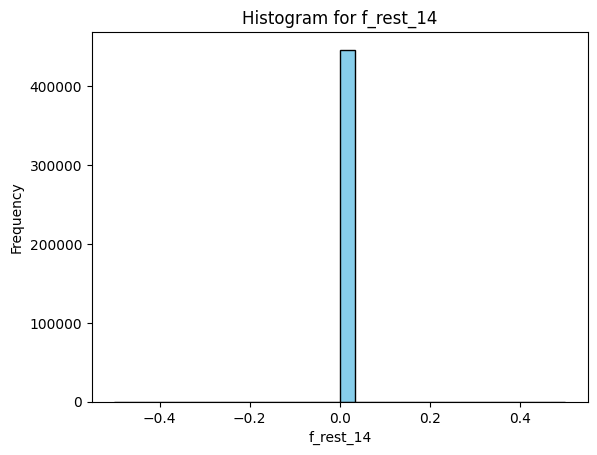

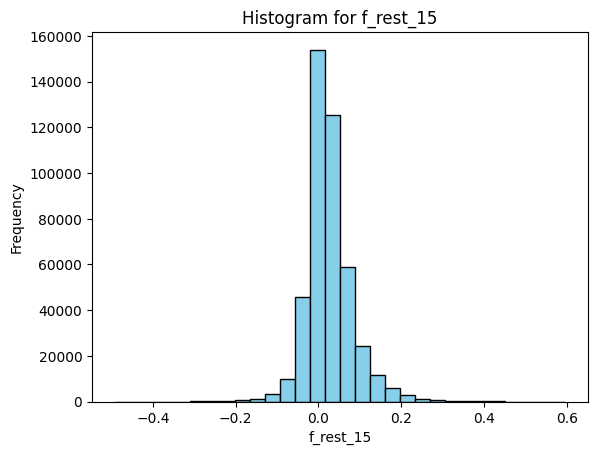

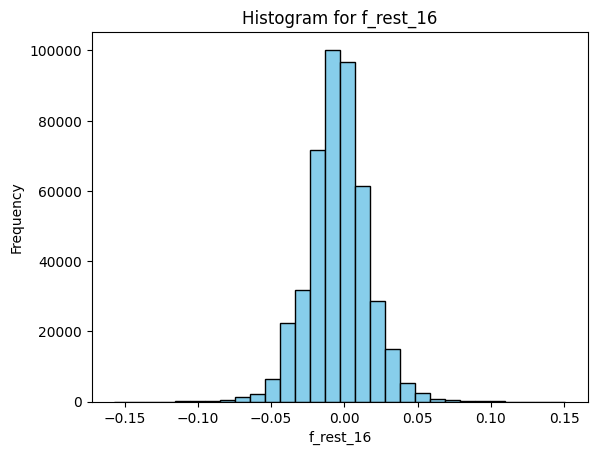

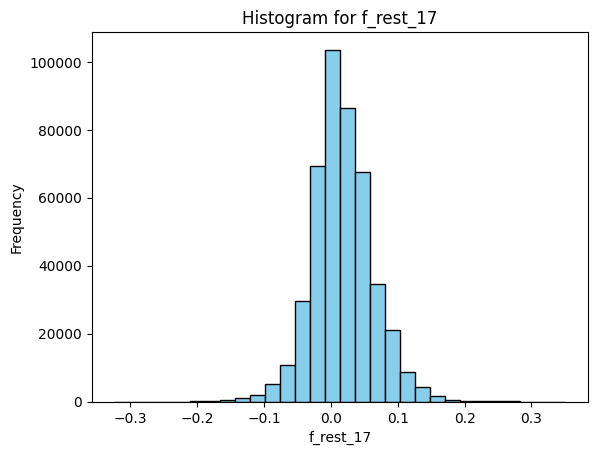

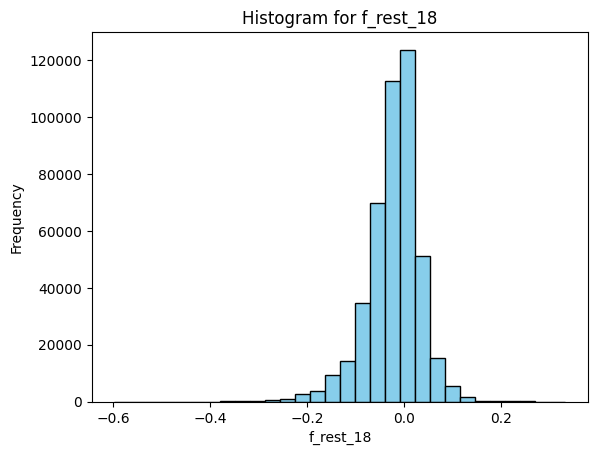

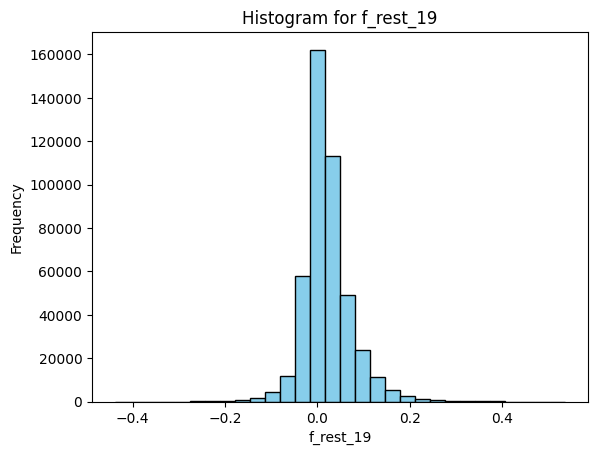

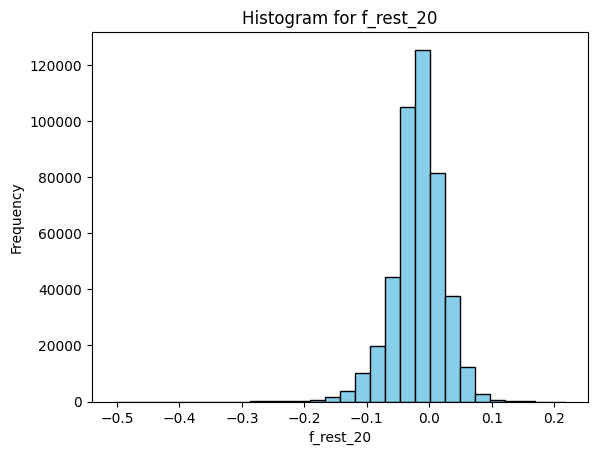

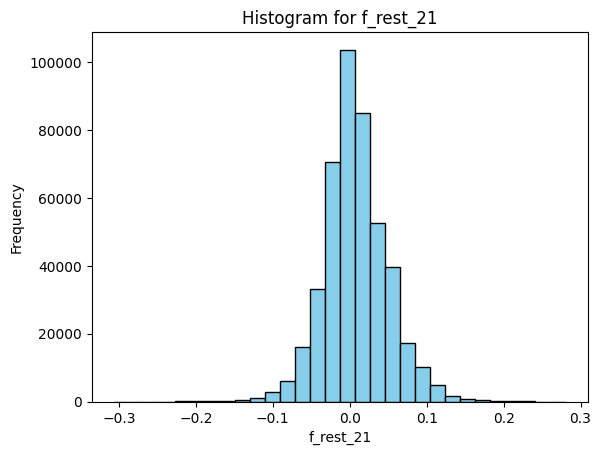

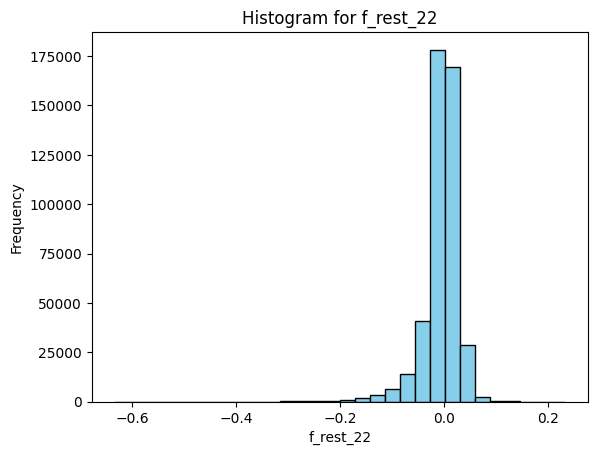

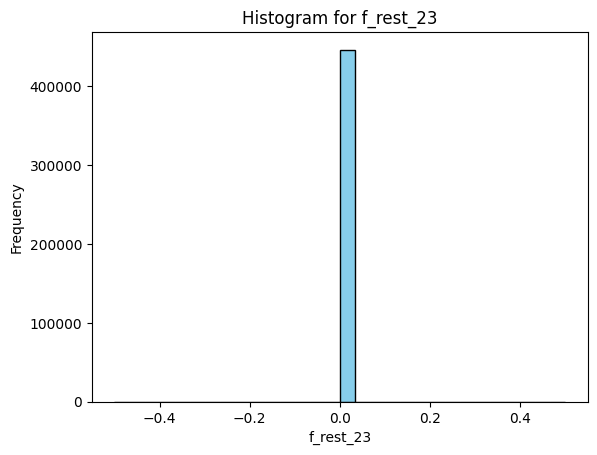

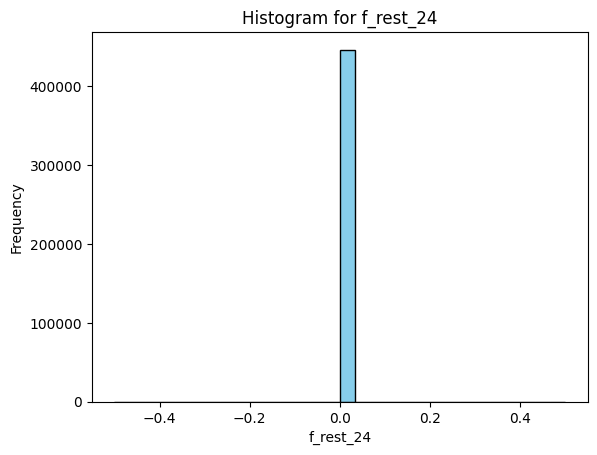

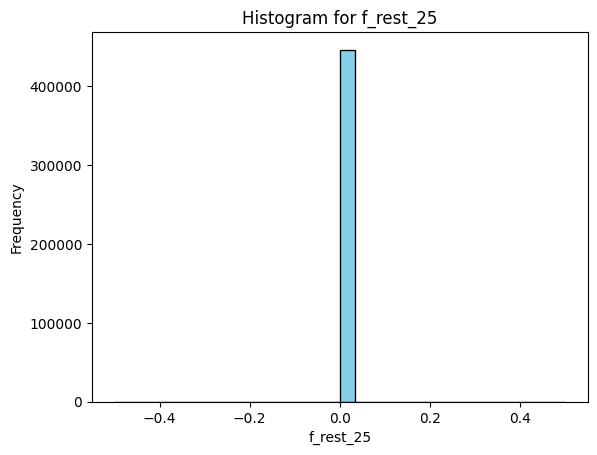

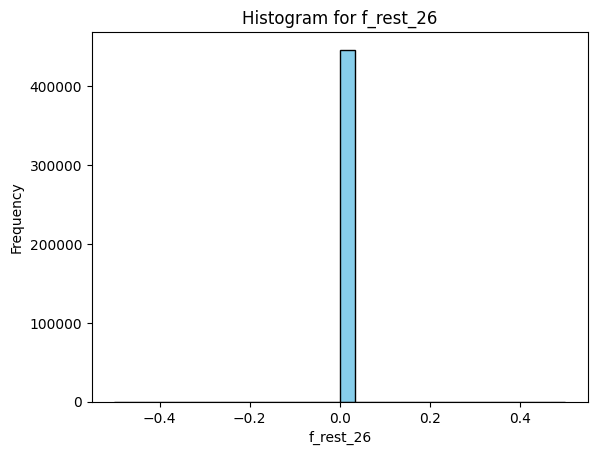

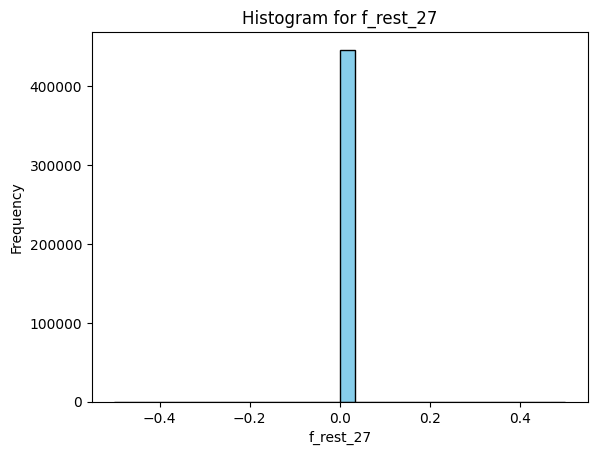

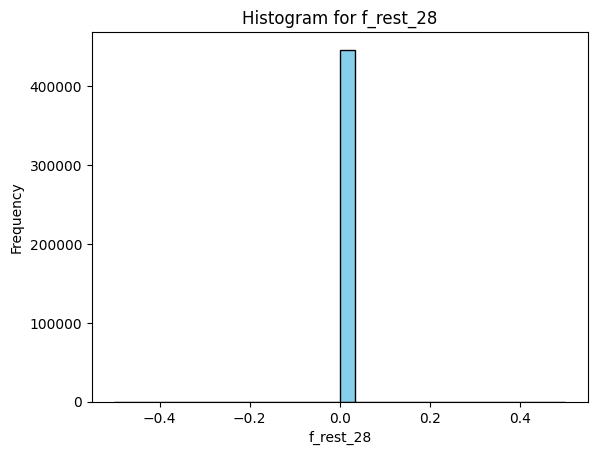

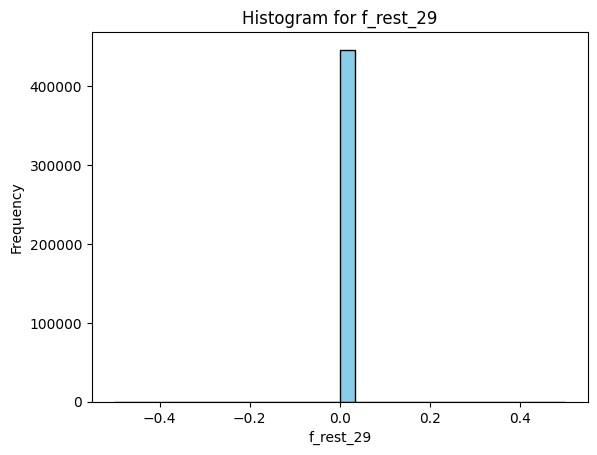

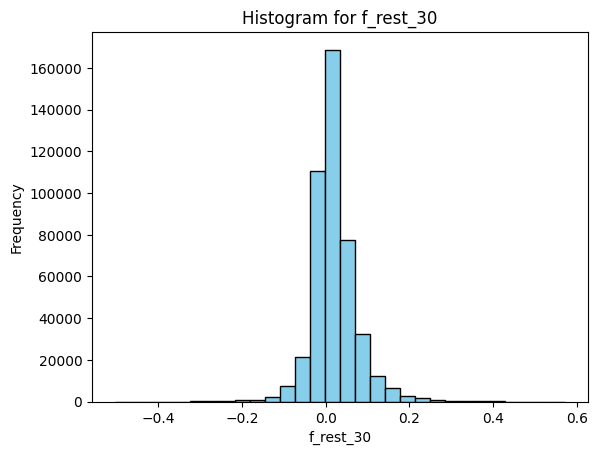

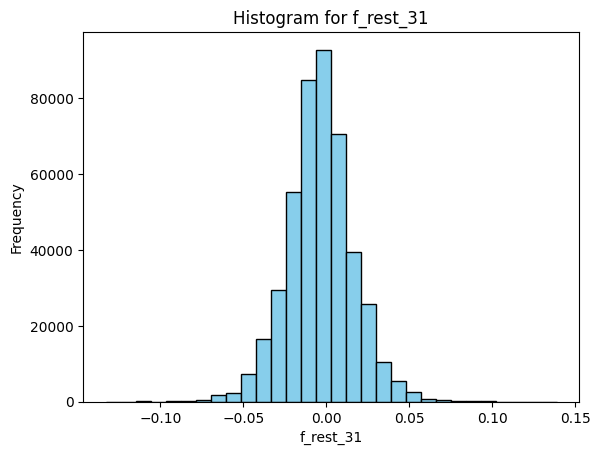

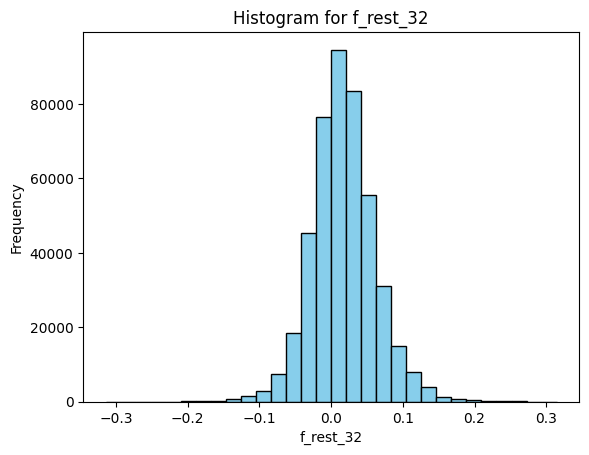

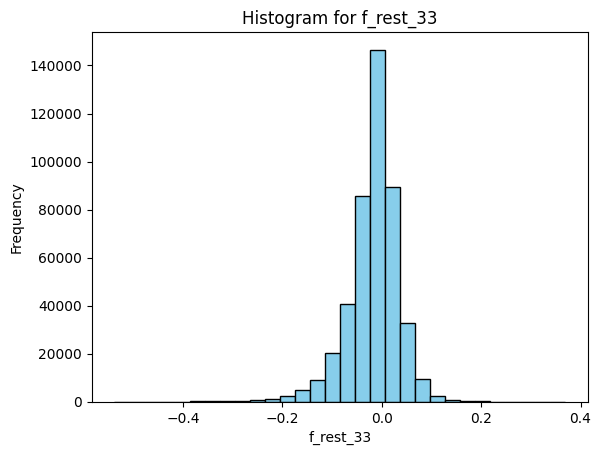

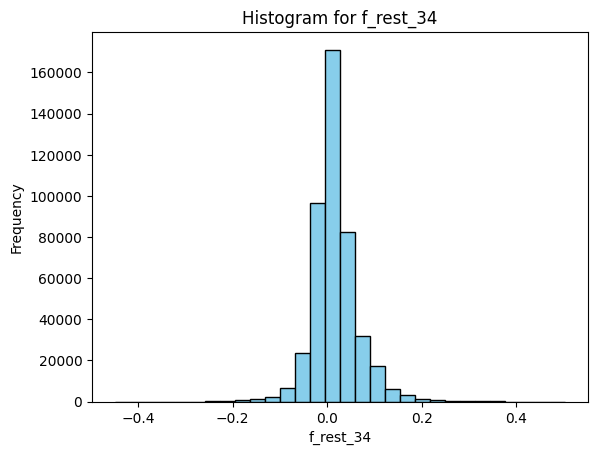

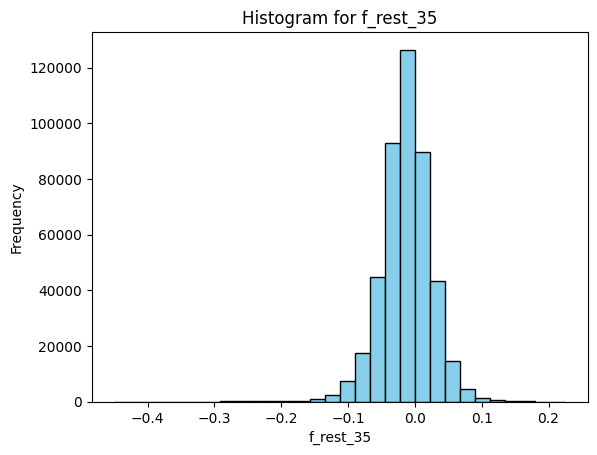

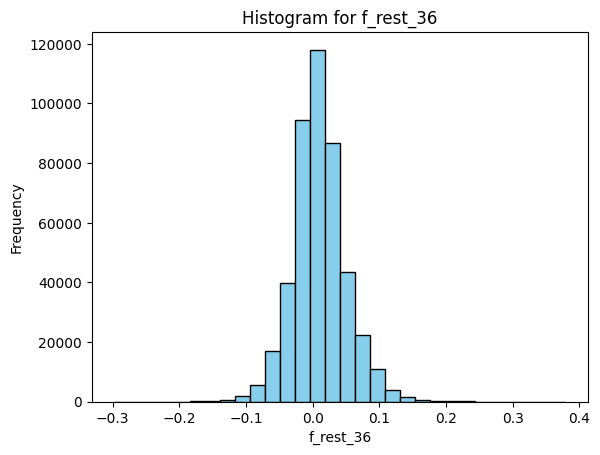

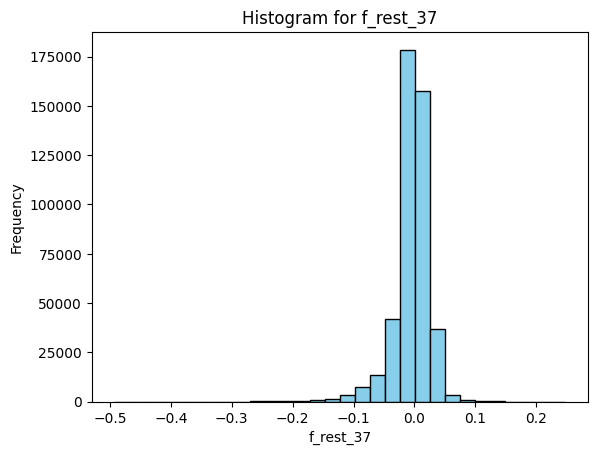

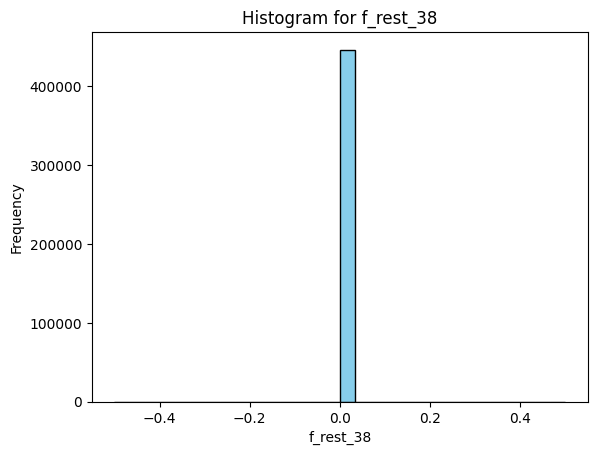

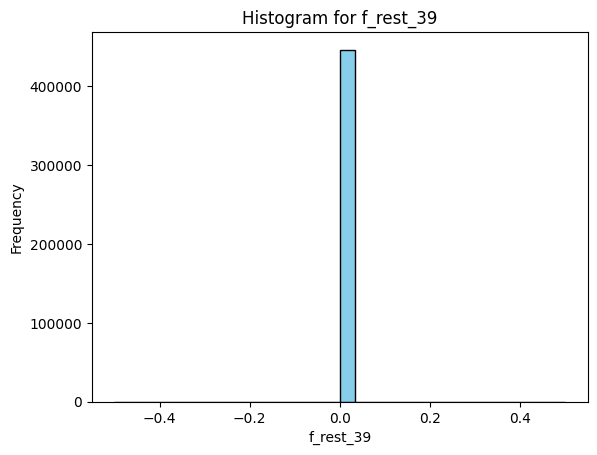

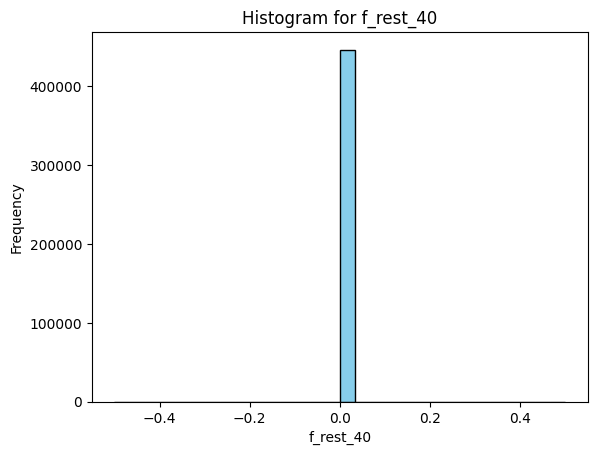

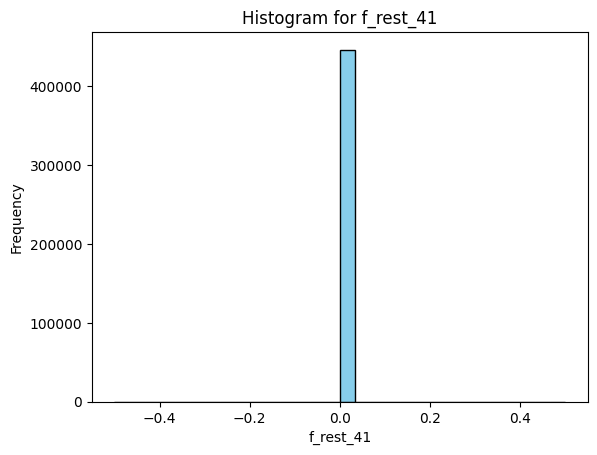

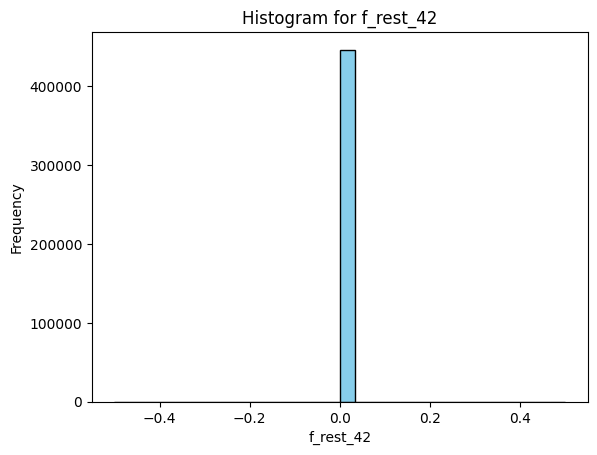

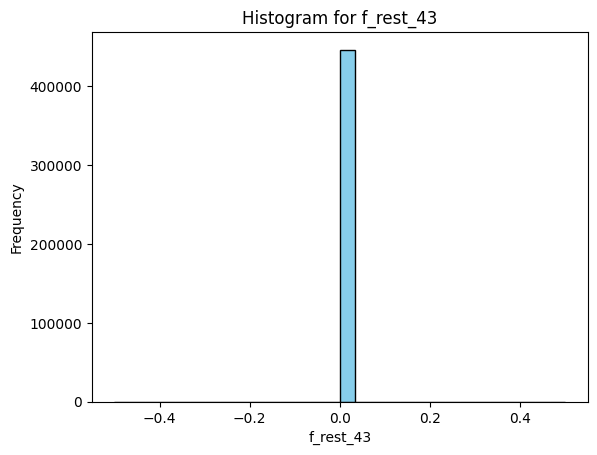

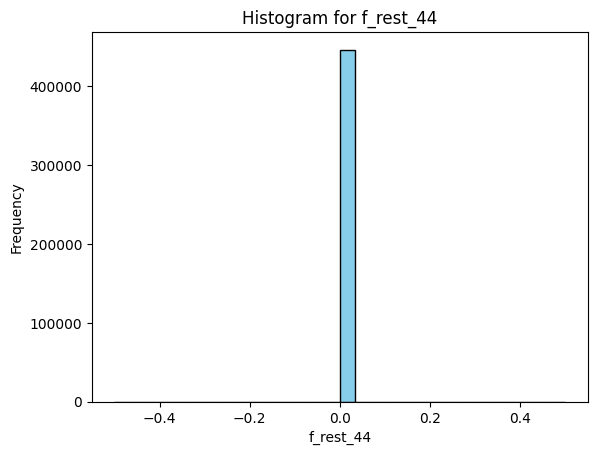

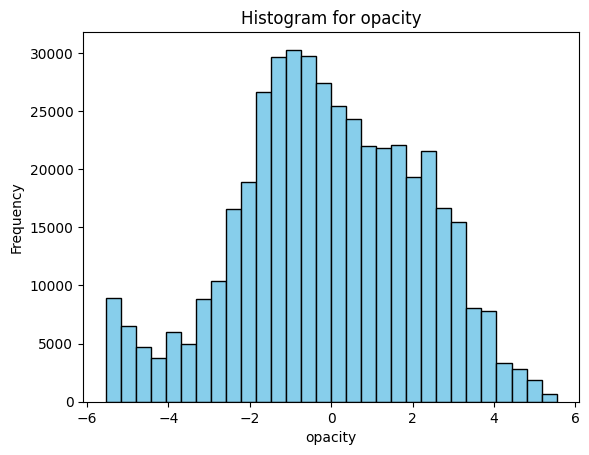

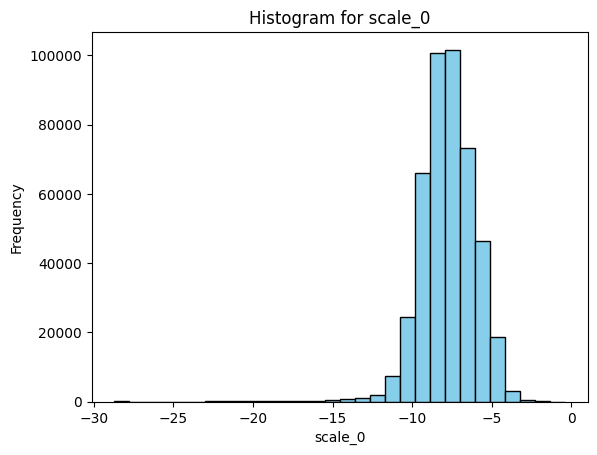

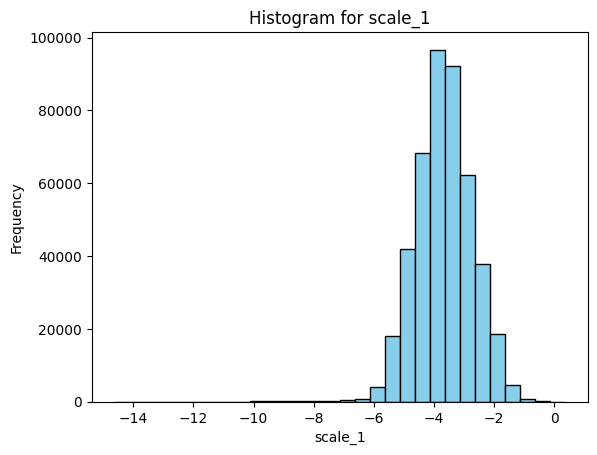

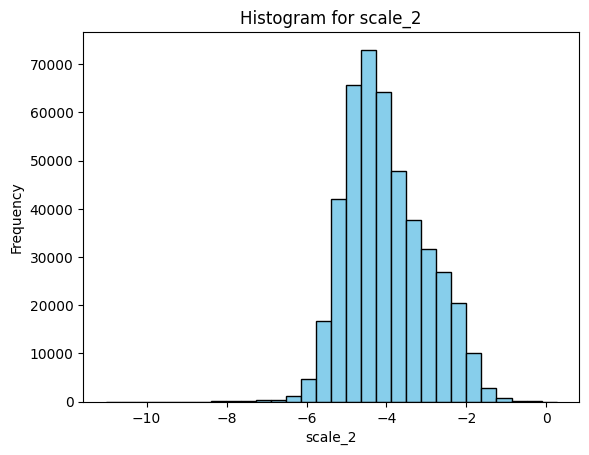

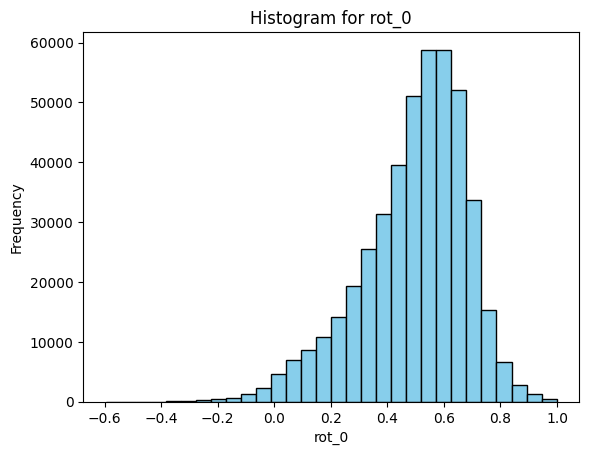

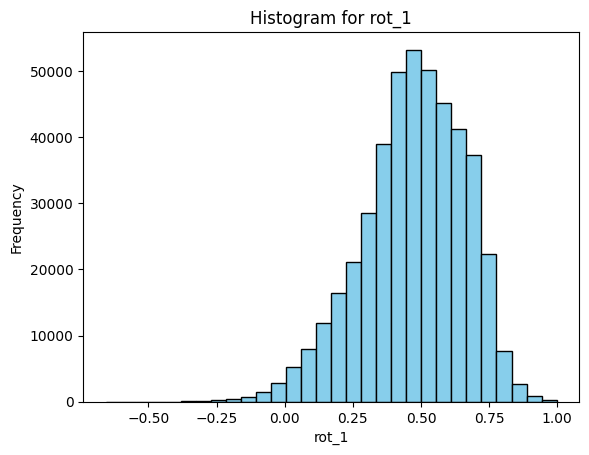

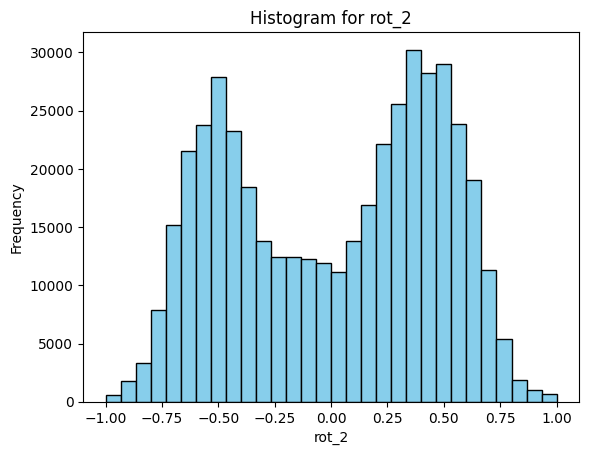

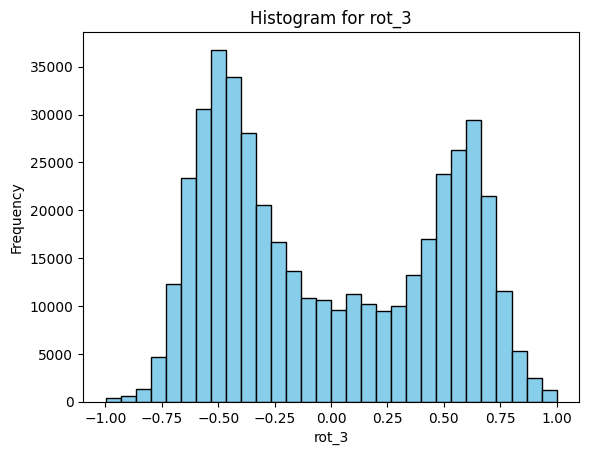

In [3]:
for header in headers:
    data = np.array(variables_per_header[header])
    finite_data = data[np.isfinite(data)]

    if len(finite_data) > 0:
        plt.hist(finite_data, bins=30, color='skyblue', edgecolor='black')
        plt.xlabel(header)
        plt.ylabel('Frequency')
        plt.title(f'Histogram for {header}')
        plt.show()
    else:
        print(f"No valid data for {header} to plot.")

In [4]:
original_df = pd.DataFrame.from_dict(variables_per_header)
original_df.columns

Index(['x', 'y', 'z', 'nx', 'ny', 'nz', 'f_dc_0', 'f_dc_1', 'f_dc_2',
       'f_rest_0', 'f_rest_1', 'f_rest_2', 'f_rest_3', 'f_rest_4', 'f_rest_5',
       'f_rest_6', 'f_rest_7', 'f_rest_8', 'f_rest_9', 'f_rest_10',
       'f_rest_11', 'f_rest_12', 'f_rest_13', 'f_rest_14', 'f_rest_15',
       'f_rest_16', 'f_rest_17', 'f_rest_18', 'f_rest_19', 'f_rest_20',
       'f_rest_21', 'f_rest_22', 'f_rest_23', 'f_rest_24', 'f_rest_25',
       'f_rest_26', 'f_rest_27', 'f_rest_28', 'f_rest_29', 'f_rest_30',
       'f_rest_31', 'f_rest_32', 'f_rest_33', 'f_rest_34', 'f_rest_35',
       'f_rest_36', 'f_rest_37', 'f_rest_38', 'f_rest_39', 'f_rest_40',
       'f_rest_41', 'f_rest_42', 'f_rest_43', 'f_rest_44', 'opacity',
       'scale_0', 'scale_1', 'scale_2', 'rot_0', 'rot_1', 'rot_2', 'rot_3'],
      dtype='object')

In [5]:
def remove_features_func(dictionairy, headers_to_remove):
    dictionairy_copied = dictionairy.copy()
    for header in headers_to_remove:
        if header in dictionairy_copied.keys():
            del dictionairy_copied[header]
    return pd.DataFrame.from_dict(dictionairy_copied)

In [6]:
def clean_features_and_apply_model(dataframe, model):
    dataframe_copy = dataframe.copy()
    dataframe_copy.fillna(dataframe_copy.mean(), inplace=True)
    dataframe_copy.replace([np.inf, -np.inf], np.nan, inplace=True) 
    dataframe_copy.fillna(dataframe_copy.mean(), inplace=True)
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataframe_copy)
    model.fit(scaled_data)
    dataframe_copy['cluster'] = model.labels_
    return dataframe_copy

In [7]:
def export_ply_file_withClusters(original_dataframe, clustered_dataframe, name_ply_file):
    columns_xyz = ['x', 'y', 'z']
    complete_dataframe = original_dataframe[columns_xyz].copy()
    complete_dataframe['cluster'] = clustered_dataframe['cluster'].values 
    dtypes = []
    for column in columns_xyz:
        dtypes.append((column, 'f4'))  
    dtypes.append(('cluster', 'i4')) 
    vertex_data = np.array(list(zip(*[complete_dataframe[col] for col in complete_dataframe.columns])), dtype=dtypes)
    vertex_element = PlyElement.describe(vertex_data, 'vertex')
    ply_data = PlyData([vertex_element], text=False)
    ply_data.write(name_ply_file)

In [8]:
def plot_in_python(original_dataframe, clustered_dataframe):
    columns_xyz = ['x', 'y', 'z']
    complete_dataframe = original_dataframe[columns_xyz].copy()
    complete_dataframe['cluster'] = clustered_dataframe['cluster'].values
    dtypes = []
    for column in columns_xyz:
        dtypes.append((column, 'f4'))  
    dtypes.append(('cluster', 'i4')) 
    vertex_data = np.array(list(zip(*[complete_dataframe[col] for col in complete_dataframe.columns])), dtype=dtypes)
    vertex_element = PlyElement.describe(vertex_data, 'vertex')
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    scatter = ax.scatter(vertex_element['x'], vertex_element['y'], -vertex_element['z'],  # Negate z for the desired direction
                         c=vertex_element['cluster'], cmap='viridis', marker='o', s=0.1)  # s=10 for smaller points
    unique_clusters = np.unique(vertex_element['cluster'])
    for cluster in unique_clusters:
        ax.scatter([], [], [], label=f'Cluster {cluster}', color=scatter.cmap(scatter.norm(cluster)), s=10)
    ax.legend(title='Clusters', loc='upper right')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z)')
    plt.title('3D Point Cloud Colored by Cluster')
    ax.view_init(elev=90, azim=90) 

    plt.show()

C:\Users\marie\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


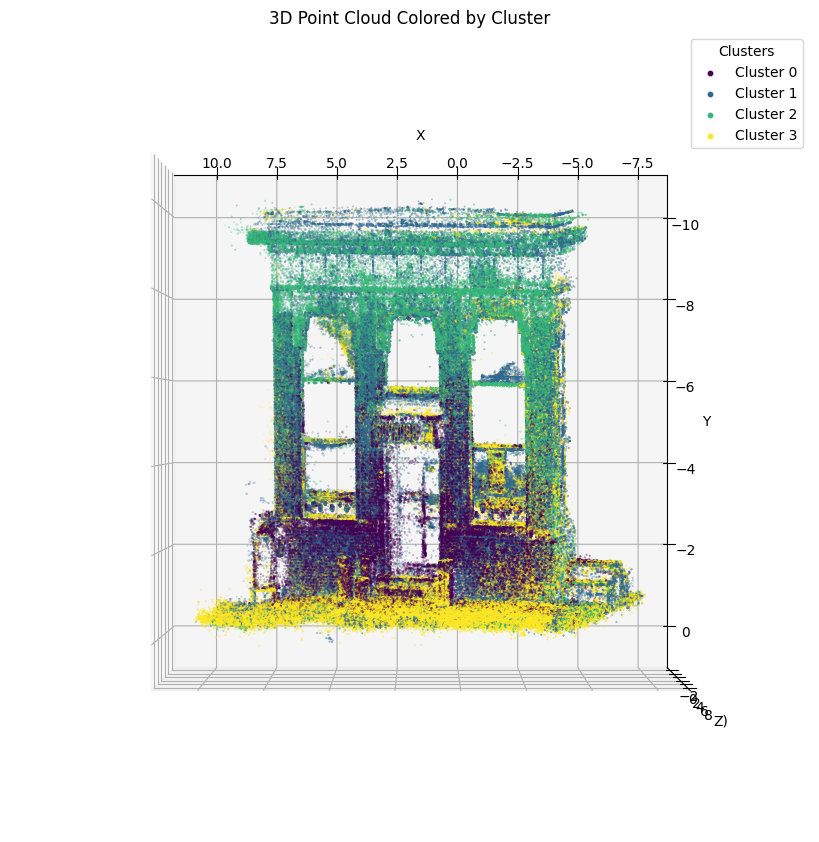

In [9]:
#CLuster with all features stored after performd Gaussian Splatting
features_to_remove = []

df_lessLabels = remove_features_func(variables_per_header, features_to_remove)
model = KMeans(n_clusters=4, random_state=42)
df_cluster = clean_features_and_apply_model(df_lessLabels, model)
# export_ply_file_clustered(original_df, df_cluster_v1, "clusters_v1.ply")
plot_in_python(original_df, df_cluster)

C:\Users\marie\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


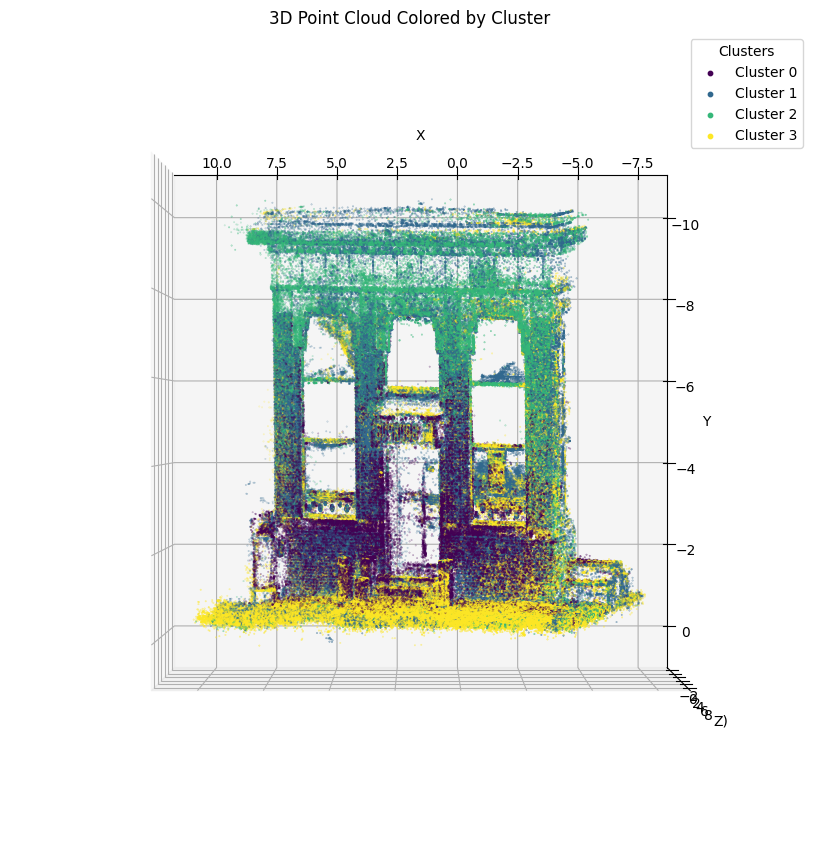

In [10]:
# Remove all features that have for all points a value of 0.
features_to_remove = ['nx', 'ny', 'nz', 'f_rest_8', 'f_rest_9', 'f_rest_10', 'f_rest_11', 'f_rest_12', 'f_rest_13', 'f_rest_14', 'f_rest_23', 'f_rest_24', 'f_rest_25', 'f_rest_26', 'f_rest_27', 'f_rest_28', 'f_rest_29', 'f_rest_38', 'f_rest_39', 'f_rest_40', 'f_rest_41', 'f_rest_42', 'f_rest_43', 'f_rest_44']

df_lessLabels = remove_features_func(variables_per_header, features_to_remove)
model = KMeans(n_clusters=4, random_state=42)
df_cluster = clean_features_and_apply_model(df_lessLabels, model)
# export_ply_file_clustered(original_df, df_cluster, "clusters_v1.ply")
plot_in_python(original_df, df_cluster)

C:\Users\marie\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


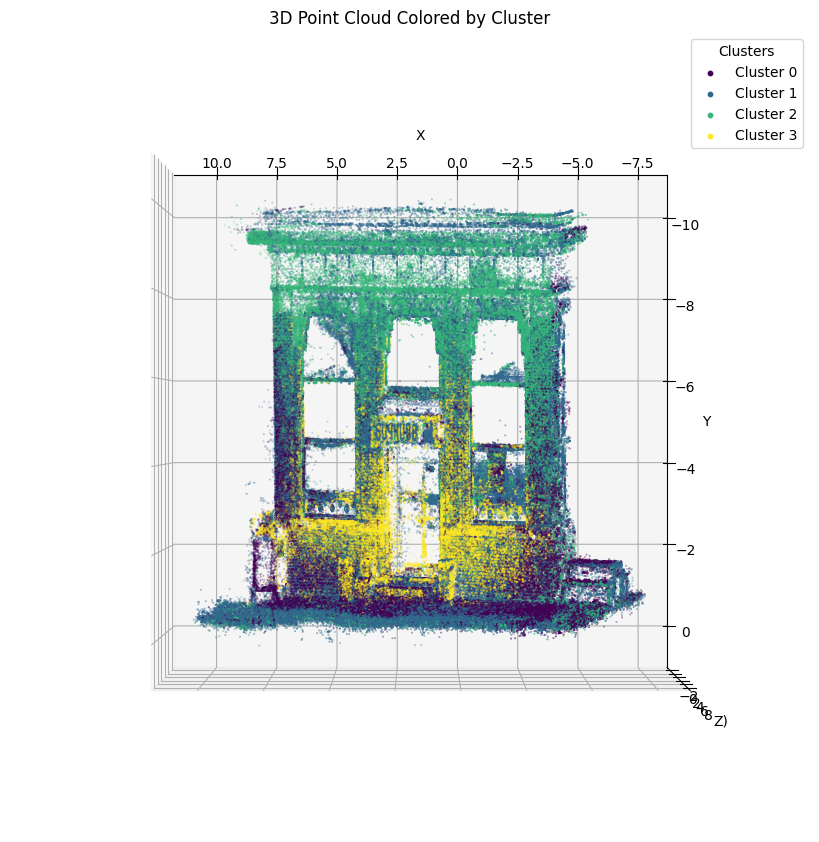

In [11]:
# Remove all features that have for all points a value of 0 and remove x,y,z to see if it only looks at x,y,z
features_to_remove= ['nx', 'ny', 'nz', 'f_rest_8', 'f_rest_9', 'f_rest_10', 'f_rest_11', 'f_rest_12', 'f_rest_13', 'f_rest_14', 'f_rest_23', 'f_rest_24', 'f_rest_25', 'f_rest_26', 'f_rest_27', 'f_rest_28', 'f_rest_29', 'f_rest_38', 'f_rest_39', 'f_rest_40', 'f_rest_41', 'f_rest_42', 'f_rest_43', 'f_rest_44', 'x', 'y', 'z']

df_lessLabels = remove_features_func(variables_per_header, features_to_remove)
model = KMeans(n_clusters=4, random_state=42)
df_cluster = clean_features_and_apply_model(df_lessLabels, model)
# export_ply_file_clustered(original_df, df_cluster_v1, "clusters_v1.ply")
plot_in_python(original_df, df_cluster)

C:\Users\marie\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


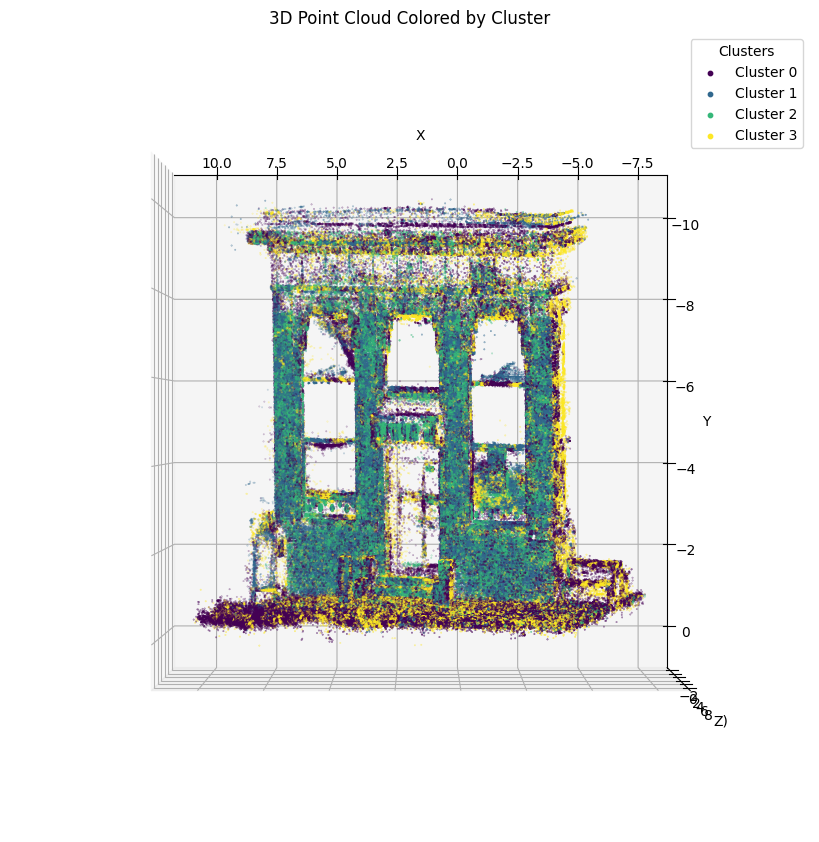

In [12]:
# Only keeping features rotation, scale, opacity
features_to_remove= ['x', 'y', 'z', 'nx', 'ny', 'nz', 'f_dc_0', 'f_dc_1', 'f_dc_2',
       'f_rest_0', 'f_rest_1', 'f_rest_2', 'f_rest_3', 'f_rest_4', 'f_rest_5',
       'f_rest_6', 'f_rest_7', 'f_rest_8', 'f_rest_9', 'f_rest_10',
       'f_rest_11', 'f_rest_12', 'f_rest_13', 'f_rest_14', 'f_rest_15',
       'f_rest_16', 'f_rest_17', 'f_rest_18', 'f_rest_19', 'f_rest_20',
       'f_rest_21', 'f_rest_22', 'f_rest_23', 'f_rest_24', 'f_rest_25',
       'f_rest_26', 'f_rest_27', 'f_rest_28', 'f_rest_29', 'f_rest_30',
       'f_rest_31', 'f_rest_32', 'f_rest_33', 'f_rest_34', 'f_rest_35',
       'f_rest_36', 'f_rest_37', 'f_rest_38', 'f_rest_39', 'f_rest_40',
       'f_rest_41', 'f_rest_42', 'f_rest_43', 'f_rest_44']
 
df_lessLabels = remove_features_func(variables_per_header, features_to_remove)
model = KMeans(n_clusters=4, random_state=42)
df_cluster = clean_features_and_apply_model(df_lessLabels, model)
# export_ply_file_clustered(original_df, df_cluster, "clusters_v2.ply")
plot_in_python(original_df, df_cluster)

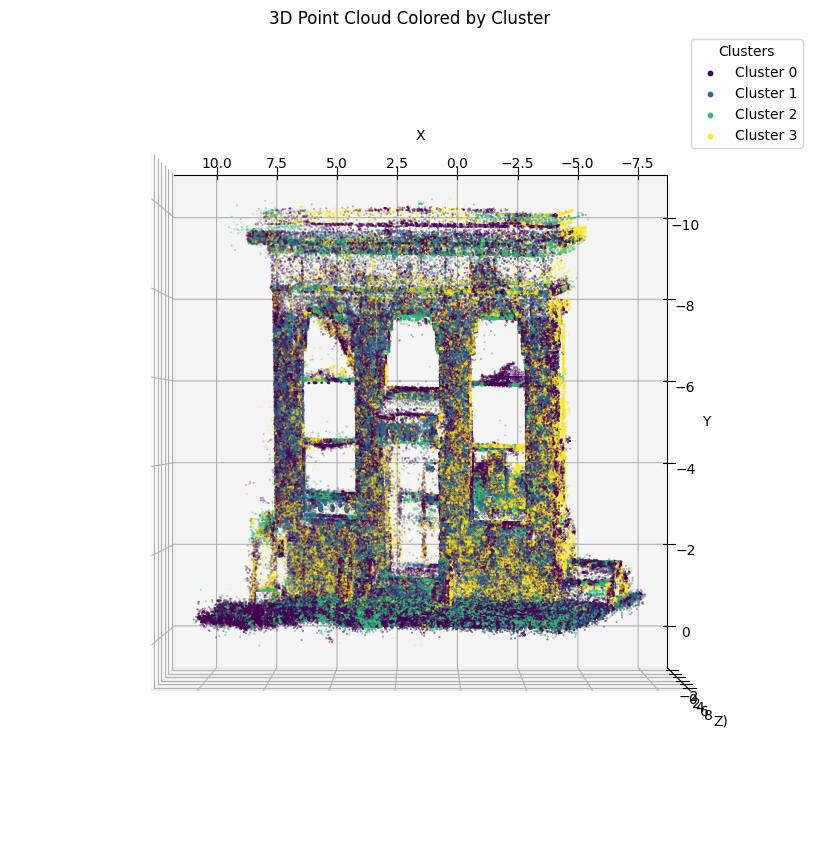

In [13]:
# only keeping rotation features
headers_to_remove= ['x', 'y', 'z', 'nx', 'ny', 'nz', 'f_dc_0', 'f_dc_1', 'f_dc_2',
       'f_rest_0', 'f_rest_1', 'f_rest_2', 'f_rest_3', 'f_rest_4', 'f_rest_5',
       'f_rest_6', 'f_rest_7', 'f_rest_8', 'f_rest_9', 'f_rest_10',
       'f_rest_11', 'f_rest_12', 'f_rest_13', 'f_rest_14', 'f_rest_15',
       'f_rest_16', 'f_rest_17', 'f_rest_18', 'f_rest_19', 'f_rest_20',
       'f_rest_21', 'f_rest_22', 'f_rest_23', 'f_rest_24', 'f_rest_25',
       'f_rest_26', 'f_rest_27', 'f_rest_28', 'f_rest_29', 'f_rest_30',
       'f_rest_31', 'f_rest_32', 'f_rest_33', 'f_rest_34', 'f_rest_35',
       'f_rest_36', 'f_rest_37', 'f_rest_38', 'f_rest_39', 'f_rest_40',
       'f_rest_41', 'f_rest_42', 'f_rest_43', 'f_rest_44', 'opacity',
       'scale_0', 'scale_1', 'scale_2']
 
df_lessLabels = remove_headers_func(variables_per_header, headers_to_remove)
model = KMeans(n_clusters=4, random_state=42)
df_cluster = clean_features_apply_model(df_lessLabels, model)
# export_ply_file_clustered(original_df, df_cluster, "clusters_v3.ply")
plot_in_python(original_df, df_cluster)

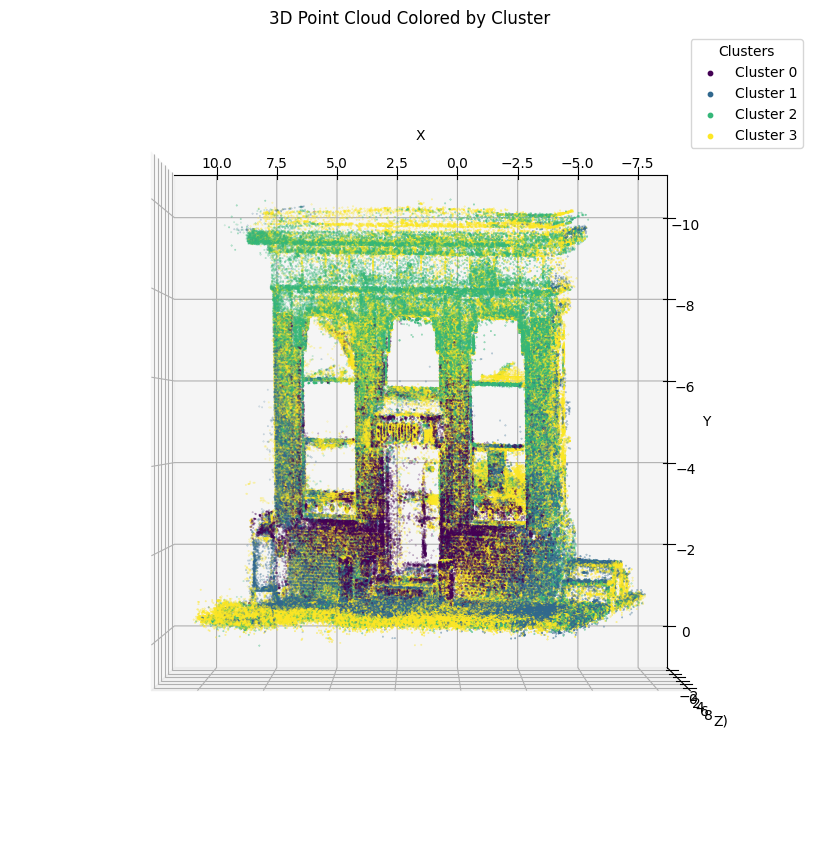

In [14]:
# Only keeping f_rest... features
headers_to_remove= ['x', 'y', 'z', 'nx', 'ny', 'nz', 'opacity', 'scale_0', 'scale_1', 'scale_2', 'rot_0', 'rot_1', 'rot_2', 'rot_3']
 
df_lessLabels = remove_headers_func(variables_per_header, headers_to_remove)
model = KMeans(n_clusters=4, random_state=42)
df_cluster = clean_features_apply_model(df_lessLabels, model)
# export_ply_file_clustered(original_df, df_cluster, "clusters_v4.ply")
plot_in_python(original_df, df_cluster)